In [2]:
### Import necessary modules
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

In [3]:

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

In [4]:
df, data_version_description, numeric_cols, cat_cols = vv.dataset_modelling_version(iteration_code="0053_20220716", row_limit=0)
print(data_version_description)
print(df.shape)
df.sample(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:439: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 24143/49617/44393/44954/16764 ==> 24143/40079/39870/39886/16764
type <class 'pandas.core.indexes.base.Index'>
22254
21862
21829
21801
Shared ownership houses predict significantly higher than they should. I'm removing all the shared ownership properties I can find.
(21801, 16)


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,,
118474682,250000.0,51.60863,-0.015560,0.7,1.0,1.0,15,20220107,1.0,18.0,Waltham Forest,Flats / Apartments,Flat,E,LEASEHOLD,Offers Over
96653851,375000.0,51.60901,0.018800,0.7,3.0,1.0,10,20220530,4.0,37.0,Waltham Forest,Flats / Apartments,Ground Maisonette,IG,LEASEHOLD,Offers in Excess of
119954795,430000.0,51.38266,-0.087900,0.4,2.0,1.0,14,20220214,4.0,37.0,Croydon,Houses,Semi-Detached,CR,FREEHOLD,Offers in Region of
120545255,525000.0,51.510915,-0.270448,0.4,3.0,2.0,9,20220302,9.0,37.0,Ealing,Flats / Apartments,Flat,W,LEASEHOLD,None
114180764,325000.0,51.37955,-0.239340,0.3,2.0,1.0,13,20210929,4.0,37.0,Sutton,Flats / Apartments,Maisonette,KT,SHARE_OF_FREEHOLD,None
85661772,600000.0,51.46482,-0.262786,0.3,2.0,1.0,12,20220613,4.0,NaN,Richmond upon Thames,Flats / Apartments,Flat,SW,LEASEHOLD,None
85400391,450000.0,51.4436,0.051790,0.3,2.0,2.0,13,20220601,4.0,27.0,Greenwich,Flats / Apartments,Apartment,SE,SHARE_OF_FREEHOLD,Guide Price
85554504,540000.0,51.496122,-0.075563,0.5,1.0,1.0,14,20220609,4.0,NaN,Southwark,Flats / Apartments,Apartment,SE,LEASEHOLD,Offers in Excess of
120619364,469950.0,51.532627,-0.344638,0.3,3.0,1.0,11,20220303,4.0,37.0,Ealing,Houses,Terraced,UB,FREEHOLD,None


In [5]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
                     na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21801 entries, 85780593 to 114438299
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price                             21801 non-null  float64
 1   location.latitude                 21799 non-null  float64
 2   location.longitude                21801 non-null  float64
 3   distance_to_any_train             21801 non-null  float64
 4   bedrooms_model                    21801 non-null  float64
 5   bathrooms_model                   21801 non-null  float64
 6   analyticsProperty.imageCount      21801 non-null  int64  
 7   analyticsProperty.added           21801 non-null  int64  
 8   floorplan_count                   21801 non-null  float64
 9   borough_name                      21801 non-null  object 
 10  analyticsProperty.propertyType    21801 non-null  object 
 11  propertySubType                   21799 non-null  object 
 12

In [7]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows.head(30)

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,
85170690,500000.0,51.514840,-0.432590,1.0,4.0,1.0,14,20220505,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
104183660,500000.0,51.545131,-0.439493,0.7,4.0,2.0,13,20210316,4.0,Hillingdon,Houses,End of Terrace,UB,NaN,Guide Price
106171337,500000.0,51.596492,-0.398523,0.5,2.0,2.0,17,20210429,4.0,Hillingdon,Houses,End of Terrace,HA,NaN,Offers in Excess of
124690724,500000.0,51.499580,-0.435130,0.7,3.0,1.0,18,20220705,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
124933595,500000.0,51.526210,-0.447270,1.6,3.0,1.0,17,20220713,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,Offers in Excess of
84995322,500000.0,51.482720,-0.424470,1.1,3.0,1.0,9,20220428,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN,None
116741378,500000.0,51.615757,-0.441540,0.8,2.0,1.0,13,20211123,4.0,Hillingdon,Houses,Semi-Detached,HA,NaN,Guide Price
109734920,500000.0,51.507920,-0.406600,0.7,3.0,1.0,18,20210630,4.0,Hillingdon,Houses,Terraced,UB,NaN,None
125008355,500000.0,51.529630,-0.416220,1.8,3.0,2.0,14,20220715,4.0,Hillingdon,Houses,End of Terrace,UB,NaN,Offers Over


In [8]:
df.dropna(inplace=True)

In [9]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [10]:
if False:
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.base import BaseEstimator, TransformerMixin

    # column index
    rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


    class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room

        def fit(self, X, y=None):
            return self  # nothing else to do

        def transform(self, X):

            return X

            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,
                             bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]


    # num_pipeline = Pipeline([
    #     ('imputer', SimpleImputer(strategy='median')),
    #     ('attribs_adder', CombinedAttributesAdder())
    #     ('std_scaler', StandardScaler())
    # ])

    num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

    df = num_pipeline.fit_transform(df)
else:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])  # define the transformer for categorical columns

    numeric_no_scale_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
    ])  # define the transformer for categorical columns

    categorical_transformer1 = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    categorical_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    features_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_transformer,
             ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
              'floorplan_count']),
            ('categorical1', categorical_transformer1,
             ['borough_name', 'analyticsProperty.propertyType', 'propertySubType', 'coarse_compass_direction', 'tenure.tenureType', 'analyticsProperty.priceQualifier']),  #
            ('categorical2', categorical_transformer2, [])
        ])
    features_noscale_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_no_scale_transformer,
             ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
              'floorplan_count']),
            ('categorical1', categorical_transformer1, ['borough_name', 'analyticsProperty.propertyType', 'propertySubType', 'coarse_compass_direction', 'tenure.tenureType']),
            ('categorical2', categorical_transformer2, [])
        ])
features_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType',
                                  'analyticsProperty.priceQualifier']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [11]:
features_noscale_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

Now working on LinR model...
   LinR cross-validating...
   LinR fitting...
   LinR predicting...
LinR
   LinR compare actual and predicted...
             actual    predicted   difference      % diff
ids                                                      
121752575  200000.0  464122.3125  264122.3125  132.061156
122695586  300000.0  535590.7500  235590.7500   78.530250
124596260  600000.0  377404.3125  222595.6875   37.099281
115764632  330000.0  539635.2500  209635.2500   63.525833
121647587  245000.0  453349.5625  208349.5625   85.040638
             actual    predicted   difference      % diff
ids                                                      
121752575  200000.0  464122.3125  264122.3125  132.061156
85192623   100000.0  221918.3125  121918.3125  121.918312
73077498   160000.0  353791.8125  193791.8125  121.119883
124367462  185000.0  376314.3125  191314.3125  103.413142
121647587  245000.0  453349.5625  208349.5625   85.040638
             actual    predicted  difference 

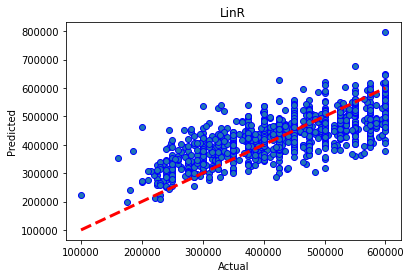

Now working on LinR Dupl model...
   LinR Dupl cross-validating...
   LinR Dupl fitting...
   LinR Dupl predicting...
LinR Dupl
   LinR Dupl compare actual and predicted...
             actual    predicted   difference      % diff
ids                                                      
121752575  200000.0  464122.3125  264122.3125  132.061156
122695586  300000.0  535590.7500  235590.7500   78.530250
124596260  600000.0  377404.3125  222595.6875   37.099281
115764632  330000.0  539635.2500  209635.2500   63.525833
121647587  245000.0  453349.5625  208349.5625   85.040638
             actual    predicted   difference      % diff
ids                                                      
121752575  200000.0  464122.3125  264122.3125  132.061156
85192623   100000.0  221918.3125  121918.3125  121.918312
73077498   160000.0  353791.8125  193791.8125  121.119883
124367462  185000.0  376314.3125  191314.3125  103.413142
121647587  245000.0  453349.5625  208349.5625   85.040638
             ac

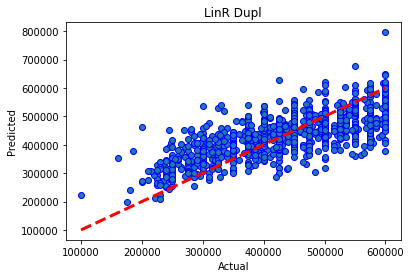

Now working on LinR noscale model...
   LinR noscale cross-validating...
   LinR noscale fitting...
   LinR noscale predicting...
LinR noscale
   LinR noscale compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
121752575  200000.0  473672.625198  273672.625198  136.836313
122695586  300000.0  531627.025303  231627.025303   77.209008
124596260  600000.0  381802.009445  218197.990555   36.366332
115764632  330000.0  534275.705468  204275.705468   61.901729
109709240  560000.0  356076.564380  203923.435620   36.414899
             actual      predicted     difference      % diff
ids                                                          
121752575  200000.0  473672.625198  273672.625198  136.836313
85192623   100000.0  215276.379119  115276.379119  115.276379
73077498   160000.0  344149.409899  184149.409899  115.093381
124367462  185000.0  382333.579777  197333.579777  106.666800
121

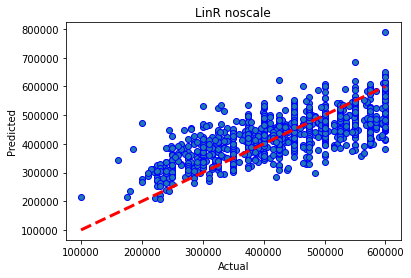

Now working on Ridge LR model...
   Ridge LR cross-validating...
   Ridge LR fitting...
   Ridge LR predicting...
Ridge LR
   Ridge LR compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
121752575  200000.0  463648.704472  263648.704472  131.824352
122695586  300000.0  535043.737951  235043.737951   78.347913
124596260  600000.0  377595.608110  222404.391890   37.067399
115764632  330000.0  539114.668999  209114.668999   63.368082
121647587  245000.0  453564.616788  208564.616788   85.128415
             actual      predicted     difference      % diff
ids                                                          
121752575  200000.0  463648.704472  263648.704472  131.824352
85192623   100000.0  222028.757597  122028.757597  122.028758
73077498   160000.0  354664.422446  194664.422446  121.665264
124367462  185000.0  376099.820643  191099.820643  103.297200
121647587  245000.0  453564

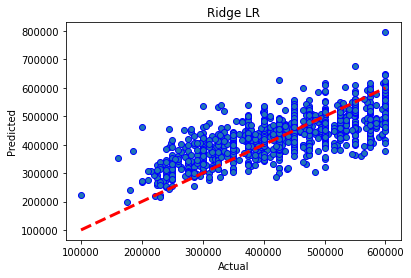

Now working on Ridge LR noscale model...
   Ridge LR noscale cross-validating...
   Ridge LR noscale fitting...
   Ridge LR noscale predicting...
Ridge LR noscale
   Ridge LR noscale compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
121752575  200000.0  473641.440282  273641.440282  136.820720
122695586  300000.0  531113.631288  231113.631288   77.037877
124596260  600000.0  381500.692161  218499.307839   36.416551
115764632  330000.0  534002.432346  204002.432346   61.818919
109709240  560000.0  356391.127815  203608.872185   36.358727
             actual      predicted     difference      % diff
ids                                                          
121752575  200000.0  473641.440282  273641.440282  136.820720
85192623   100000.0  215818.583321  115818.583321  115.818583
73077498   160000.0  344652.501544  184652.501544  115.407813
124367462  185000.0  382243.827761  19724

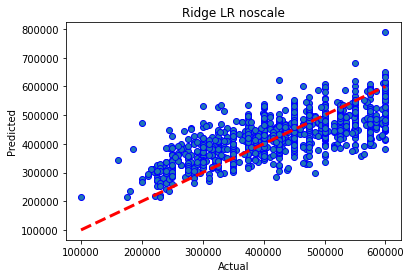

Now working on Ridge LR Best noscale model...
   Ridge LR Best noscale cross-validating...
   Ridge LR Best noscale fitting...
   Ridge LR Best noscale predicting...
Ridge LR Best noscale
   Ridge LR Best noscale compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
85192623   100000.0  369558.210517  269558.210517  269.558211
73077498   160000.0  392448.195549  232448.195549  145.280122
124367462  185000.0  404599.139724  219599.139724  118.702238
122797568  180000.0  397451.743327  217451.743327  120.806524
114543089  599000.0  388716.720585  210283.279415   35.105723
             actual      predicted     difference      % diff
ids                                                          
85192623   100000.0  369558.210517  269558.210517  269.558211
73077498   160000.0  392448.195549  232448.195549  145.280122
122797568  180000.0  397451.743327  217451.743327  120.806524
124367462  

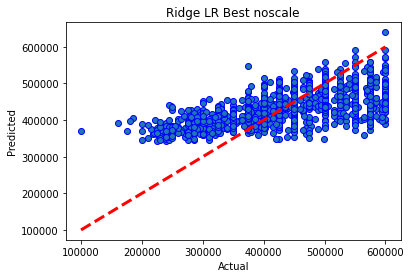

Now working on KNN Best model...
   KNN Best cross-validating...
   KNN Best fitting...
   KNN Best predicting...
KNN Best
   KNN Best compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
123508574  222000.0  467407.528571  245407.528571  110.543932
121752575  200000.0  442221.222857  242221.222857  121.110611
85192623   100000.0  338124.497143  238124.497143  238.124497
123508709  229000.0  465467.385714  236467.385714  103.260867
73077498   160000.0  396160.725714  236160.725714  147.600454
             actual      predicted     difference      % diff
ids                                                          
85192623   100000.0  338124.497143  238124.497143  238.124497
73077498   160000.0  396160.725714  236160.725714  147.600454
121752575  200000.0  442221.222857  242221.222857  121.110611
122797568  180000.0  383061.594286  203061.594286  112.811997
123508574  222000.0  467407

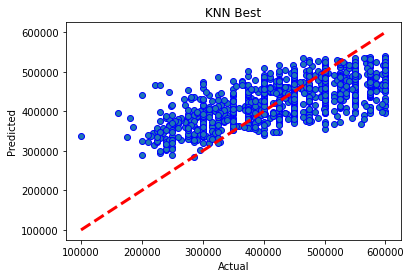

Now working on KNN model...
   KNN cross-validating...
   KNN fitting...
   KNN predicting...
KNN
   KNN compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
116672795  575000.0   305989.8    269010.2   46.784383
124624853  600000.0   339000.0    261000.0   43.500000
121752575  200000.0   450000.0    250000.0  125.000000
73077498   160000.0   400000.0    240000.0  150.000000
109709240  560000.0   328990.0    231010.0   41.251786
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0   290600.0    190600.0  190.600000
73077498   160000.0   400000.0    240000.0  150.000000
121752575  200000.0   450000.0    250000.0  125.000000
96615862   210000.0   415000.0    205000.0   97.619048
121630439  247500.0   465000.0    217500.0   87.878788
             actual  predicted  difference    % diff
ids                                     

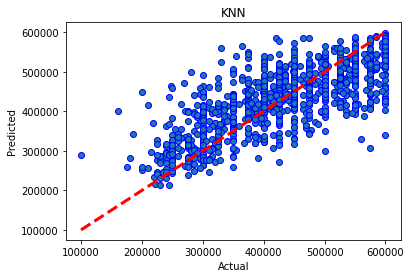

Now working on KNN noscale model...
   KNN noscale cross-validating...
   KNN noscale fitting...
   KNN noscale predicting...
KNN noscale
   KNN noscale compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
73077498   160000.0   463380.0    303380.0  189.612500
96615862   210000.0   470099.0    260099.0  123.856667
116672795  575000.0   316990.0    258010.0   44.871304
98141864   600000.0   345000.0    255000.0   42.500000
85586184   600000.0   352000.0    248000.0   41.333333
             actual  predicted  difference      % diff
ids                                                   
73077498   160000.0   463380.0    303380.0  189.612500
85192623   100000.0   278990.0    178990.0  178.990000
96615862   210000.0   470099.0    260099.0  123.856667
114763454  225000.0   449500.0    224500.0   99.777778
122797568  180000.0   357000.0    177000.0   98.333333
             actual  predicted  difference  %

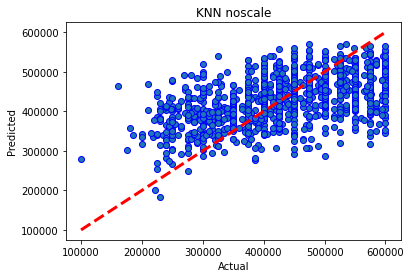

Now working on GNB model...
   GNB cross-validating...
   GNB fitting...
   GNB predicting...
GNB
   GNB compare actual and predicted...
             actual  predicted  difference     % diff
ids                                                  
120924503  545000.0   140000.0    405000.0  74.311927
124676846  600000.0   205000.0    395000.0  65.833333
119181383  550000.0   190000.0    360000.0  65.454545
119030078  599950.0   264950.0    335000.0  55.837986
123867182  525000.0   190000.0    335000.0  63.809524
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0   349000.0    249000.0  249.000000
119543090  295000.0   579950.0    284950.0   96.593220
124048736  240000.0   471000.0    231000.0   96.250000
85394445   310000.0   588000.0    278000.0   89.677419
124613177  325000.0   599999.0    274999.0   84.615077
             actual  predicted  difference  % diff
ids                                              

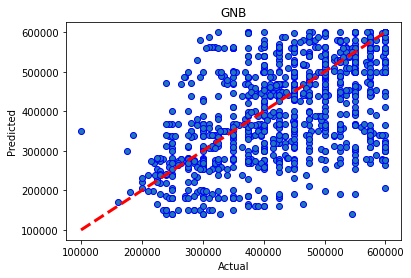

Now working on GNB noscale model...
   GNB noscale cross-validating...
   GNB noscale fitting...
   GNB noscale predicting...
GNB noscale
   GNB noscale compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
110434391  235000.0   597800.0    362800.0  154.382979
121188356  585000.0   239000.0    346000.0   59.145299
105544229  580000.0   239950.0    340050.0   58.629310
124018865  500000.0   160000.0    340000.0   68.000000
109709240  560000.0   239950.0    320050.0   57.151786
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0   349000.0    249000.0  249.000000
110434391  235000.0   597800.0    362800.0  154.382979
108993020  260000.0   559000.0    299000.0  115.000000
120681101  230000.0   478750.0    248750.0  108.152174
123387905  279950.0   559000.0    279050.0   99.678514
             actual  predicted  difference  %

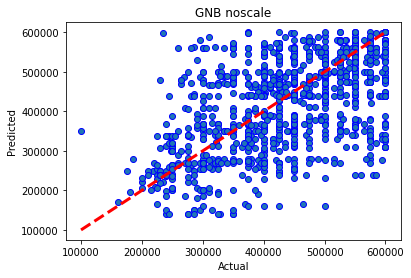

Now working on GNB Best model...
   GNB Best cross-validating...
   GNB Best fitting...
   GNB Best predicting...
GNB Best
   GNB Best compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0   450000.0    350000.0  350.000000
121630439  247500.0   550000.0    302500.0  122.222222
73077498   160000.0   450000.0    290000.0  181.250000
113734199  175000.0   450000.0    275000.0  157.142857
122797568  180000.0   450000.0    270000.0  150.000000
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0   450000.0    350000.0  350.000000
73077498   160000.0   450000.0    290000.0  181.250000
113734199  175000.0   450000.0    275000.0  157.142857
122797568  180000.0   450000.0    270000.0  150.000000
124367462  185000.0   450000.0    265000.0  143.243243
             actual  predicted  difference  % diff
ids         

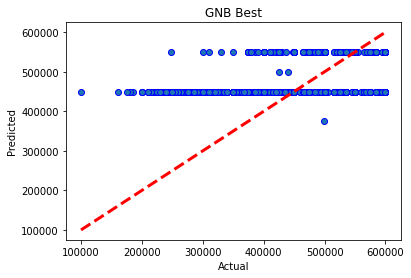

Now working on GNB Best noscale model...
   GNB Best noscale cross-validating...
   GNB Best noscale fitting...
   GNB Best noscale predicting...
GNB Best noscale
   GNB Best noscale compare actual and predicted...
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0   550000.0    450000.0  450.000000
73077498   160000.0   550000.0    390000.0  243.750000
113734199  175000.0   550000.0    375000.0  214.285714
122797568  180000.0   550000.0    370000.0  205.555556
124367462  185000.0   550000.0    365000.0  197.297297
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0   550000.0    450000.0  450.000000
73077498   160000.0   550000.0    390000.0  243.750000
113734199  175000.0   550000.0    375000.0  214.285714
122797568  180000.0   550000.0    370000.0  205.555556
124367462  185000.0   550000.0    365000.0  197.297297
             ac

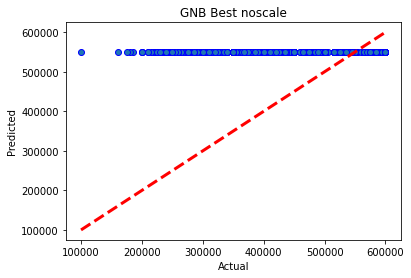

Now working on RF Best model...
   RF Best cross-validating...
   RF Best fitting...
   RF Best predicting...
RF Best
   RF Best compare actual and predicted...
             actual      predicted     difference      % diff
ids                                                          
85192623   100000.0  411383.898891  311383.898891  311.383899
73077498   160000.0  436586.937185  276586.937185  172.866836
113734199  175000.0  411383.898891  236383.898891  135.076514
122797568  180000.0  410762.465912  230762.465912  128.201370
124367462  185000.0  411470.107850  226470.107850  122.416275
             actual      predicted     difference      % diff
ids                                                          
85192623   100000.0  411383.898891  311383.898891  311.383899
73077498   160000.0  436586.937185  276586.937185  172.866836
113734199  175000.0  411383.898891  236383.898891  135.076514
122797568  180000.0  410762.465912  230762.465912  128.201370
124367462  185000.0  411470.10785

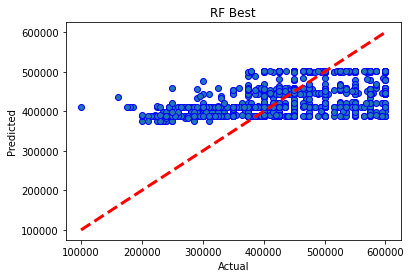

Now working on RF model...
   RF cross-validating...
   RF fitting...
   RF predicting...
RF
   RF compare actual and predicted...
             actual  predicted  difference     % diff
ids                                                  
116672795  575000.0  359148.99   215851.01  37.539306
123974465  250000.0  447697.49   197697.49  79.078996
123464447  325000.0  521337.91   196337.91  60.411665
123786491  535000.0  339058.50   195941.50  36.624579
121647587  245000.0  440889.50   195889.50  79.954898
             actual  predicted  difference      % diff
ids                                                   
85192623   100000.0  289379.70   189379.70  189.379700
96552352   200000.0  385540.00   185540.00   92.770000
121752575  200000.0  368513.95   168513.95   84.256975
124367462  185000.0  333299.95   148299.95   80.162135
121647587  245000.0  440889.50   195889.50   79.954898
             actual  predicted  difference    % diff
ids                                                 


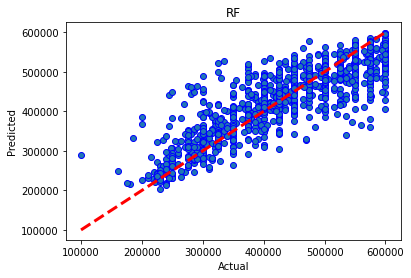

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,LinR,1,0.441457,0.040000,-5.917831e+04,-5.580945e+09,-7.470572e+04
1,LinR,2,0.312576,0.036795,-5.859711e+04,-5.351918e+09,-7.315680e+04
2,LinR,3,0.256244,0.035320,-3.642714e+13,-2.584209e+30,-1.607548e+15
3,LinR,4,0.279224,0.047937,-2.977504e+13,-1.776858e+30,-1.332988e+15
4,LinR,5,0.270991,0.038588,-5.787703e+04,-5.207977e+09,-7.216632e+04
5,LinR Dupl,1,0.360693,0.030635,-5.917831e+04,-5.580945e+09,-7.470572e+04
6,LinR Dupl,2,0.312955,0.034281,-5.859711e+04,-5.351918e+09,-7.315680e+04
7,LinR Dupl,3,0.377908,0.033719,-3.642714e+13,-2.584209e+30,-1.607548e+15
8,LinR Dupl,4,0.282154,0.035073,-2.977504e+13,-1.776858e+30,-1.332988e+15
9,LinR Dupl,5,0.205334,0.030935,-5.787703e+04,-5.207977e+09,-7.216632e+04


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge


def run_exps(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    models = [
        ('LinR', LinearRegression()),
        ('LinR Dupl', LinearRegression()),
        ('LinR noscale', LinearRegression()),
        ('Ridge LR', linear_model.Ridge(alpha=.5)),
        ('Ridge LR noscale', linear_model.Ridge(alpha=.5)),
        ('Ridge LR Best noscale', Ridge(alpha=5000, max_iter=50)),
        ('KNN Best', KNeighborsRegressor(leaf_size=5, n_neighbors=350)),
        ('KNN', KNeighborsRegressor()),
        ('KNN noscale', KNeighborsRegressor()),
        ('GNB', GaussianNB()),
        ('GNB noscale', GaussianNB()),
        ('GNB Best', GaussianNB(var_smoothing=10)),
        ('GNB Best noscale', GaussianNB(var_smoothing=10)),

        ('RF Best', RandomForestRegressor(max_features=50, max_leaf_nodes=3, n_estimators=200)),
        ('RF', RandomForestRegressor()),
        #('SVM', SVR()),
        #('XGB', XGBClassifier())
        #x('LogReg Cl', LogisticRegression()),
        #x('RF Cl', RandomForestClassifier()),
        #x('KNN Cl', KNeighborsClassifier()),
        #x('SVM Cl', SVC()),
    ]

    results = []
    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']  #, 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance'
    # ,'d2_absolute_error_score','d2_pinball_score','d2_tweedie_score'
    target_names = ['malignant', 'benign']
    for name, model in models:
        print(f"Now working on {name} model...")
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        print(f"   {name} cross-validating...")
        if 'noscale' in name:
            pipe = Pipeline(steps=[
                ('preprocessor', features_noscale_preprocessor),  # preprocess features
                ('estimator', model),
            ])  # start the training
        else:
            pipe = Pipeline(steps=[
                ('preprocessor', features_preprocessor),
                ('estimator', model),  # preprocess features
            ])  # start the training
        pipe.fit(X_train, y_train)
        ###print(X_train.head(5))
        ###print(y_train.head(5))
        cv_results = model_selection.cross_validate(pipe, X_train, y_train, cv=kfold, scoring=scoring)

        print(f"   {name} fitting...")
        #clf = model.fit(X_train, y_train)

        print(f"   {name} predicting...")
        #y_pred = clf.predict(X_test)
        y_pred = pipe.predict(X_test)
        print(name)
        mae = metrics.mean_absolute_error(y_test, y_pred)  # NEW
        mse = metrics.mean_squared_error(y_test, y_pred)  # NEW
        r2 = metrics.r2_score(y_test, y_pred)  # NEW
        #print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        #this_df['model'] = name
        this_df.insert(loc=0, column='model', value=name)
        this_df.insert(loc=1, column='run', value=range(1, 6))
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)

        print(f"   {name} compare actual and predicted...")
        df2 = X_test[['bedrooms_model', 'bathrooms_model']].copy()
        df2['actual'] = y_test
        #df2.reset_index(inplace=True)
        df2['predicted'] = y_pred
        df2['difference'] = abs(df2["actual"] - df2["predicted"])
        df2['% diff'] = (abs(df2["actual"] - df2["predicted"])) / df2["actual"] * 100
        df2 = df2[['actual', 'predicted', 'difference', '% diff']].sort_values(by='difference', ascending=False)
        df3 = df2[['actual', 'predicted', 'difference', '% diff']].sort_values(by='% diff', ascending=False)
        print(df2.head(5))
        print(df3.head(5))
        print(df2.tail(5))

        print(f"   {name} graphing...")
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')
        ax.title.set_text(name)

        plt.show()

    #final.insert(loc=0, column='model2', value=names)
    return final


multi_model_evaluation = run_exps(X_train, y_train, X_test, y_test)
multi_model_evaluation

In [13]:
multi_model_evaluation.sort_values('test_neg_mean_squared_error')
multi_model_evaluation.sort_values('test_neg_mean_absolute_error', ascending=False)
multi_model_evaluation.sort_values('test_neg_root_mean_squared_error', ascending=False)

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
71,RF,2,14.601801,0.154636,-4.442435e+04,-3.499780e+09,-5.915893e+04
74,RF,5,16.141953,0.336282,-4.485175e+04,-3.512186e+09,-5.926370e+04
72,RF,3,19.346698,0.139601,-4.450801e+04,-3.549011e+09,-5.957357e+04
73,RF,4,18.703959,0.162695,-4.658299e+04,-3.764322e+09,-6.135407e+04
70,RF,1,17.668061,0.136989,-4.605449e+04,-3.852778e+09,-6.207075e+04
39,KNN,5,0.068122,0.377302,-5.510545e+04,-5.089108e+09,-7.133799e+04
19,Ridge LR,5,0.188424,0.046577,-5.788655e+04,-5.205382e+09,-7.214833e+04
9,LinR Dupl,5,0.205334,0.030935,-5.787703e+04,-5.207977e+09,-7.216632e+04
4,LinR,5,0.270991,0.038588,-5.787703e+04,-5.207977e+09,-7.216632e+04
37,KNN,3,0.079240,0.351796,-5.556243e+04,-5.236826e+09,-7.236592e+04


In [14]:
multi_model_evaluation[multi_model_evaluation['model'] == 'RF']

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
70,RF,1,17.668061,0.136989,-46054.489100,-3.852778e+09,-62070.751846
71,RF,2,14.601801,0.154636,-44424.352949,-3.499780e+09,-59158.934823
72,RF,3,19.346698,0.139601,-44508.008176,-3.549011e+09,-59573.572192
73,RF,4,18.703959,0.162695,-46582.989377,-3.764322e+09,-61354.074556
74,RF,5,16.141953,0.336282,-44851.751301,-3.512186e+09,-59263.696405


In [15]:
#df.head()
#df.loc[123439364]
#df.loc[124483172]
# 85129713
# 119764643
# 111998573
# 85766559
#df.loc[df['id']==124483172]
#,119764643,111998573,85766559
df.loc[['123439364']]

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType,analyticsProperty.priceQualifier
ids,,,,,,,,,,,,,,,
123439364,425000.0,51.390103,-0.061155,0.2,3.0,1.0,12,20220518,4.0,Croydon,Character Property,Character Property,SE,FREEHOLD,None
